In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

numpy>다차원 배열을 위한 기능과 선형 대수 연산과 푸리에 변환 같은 고수준 수학 함수와 유사 난수 생성기 포함

matplotlib>파이썬의 대표적인 과학 계산용 그래프 라이브러리

pandas>데이터 처리와 분석을 위한 파이썬 라이브러리

mglearn>그래프나 데이터 적재와 관련된 세세한 코드를 일일이 쓰지 않아도 되게끔 만든 유틸리티 함수

In [2]:
from sklearn.datasets import load_iris

라이브러리 및 데이터베이스 import

In [3]:
iris_dataset=load_iris()

In [4]:
print("iris_dataset의 키:{}".format(iris_dataset.keys()))

iris_dataset의 키:dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
print(iris_dataset['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [6]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
print("타겟의 이름:{}".format(iris_dataset['target_names']))

타겟의 이름:['setosa' 'versicolor' 'virginica']


붓꽃 종류 세가지 확인 가능

In [8]:
print("특징이름:{}".format(iris_dataset['feature_names']))

특징이름:['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


종류를 구분하는 특징의 종류 출력

In [9]:
print("타깃:{}".format(iris_dataset['target']))

타깃:[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


타깃 값 출력(3종류이므로 0-2로 표현)

DESCR>데이터셋에 대한 간략한 설명들어있음

target_names> 붓꽃 품종의 이름을 문자열 배열로 가짐

feature_names> 각 특성을 설명하는 문자열 리스트

실제 데이터는 target, data 필드에 들어잇음
data는 Numpy배열

In [10]:
print("데이터:{}".format(iris_dataset['data']))

데이터:[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.

데이터 값 전체 출력

In [11]:
print("처음 5행:\n{}".format(iris_dataset['data'][:5]))

처음 5행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


데이터의 첫 5개의 값 출력

In [12]:
print("data의 타입:{}".format(type(iris_dataset['data'])))

data의 타입:<class 'numpy.ndarray'>


In [13]:
print("data의 크기:{}".format(iris_dataset['data'].shape))

data의 크기:(150, 4)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)

In [15]:
print("X_train 크기:{}".format(X_train.shape))
print("y_train 크기:{}".format(y_train.shape))

X_train 크기:(112, 4)
y_train 크기:(112,)


X데이터는 행렬, y 데이터는 타겟

In [16]:
print("X_test 크기:{}".format(X_test.shape))
print("y_test 크기:{}".format(y_test.shape))

X_test 크기:(38, 4)
y_test 크기:(38,)


훈련값:테스트값은 초기값으로 3:1비율

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

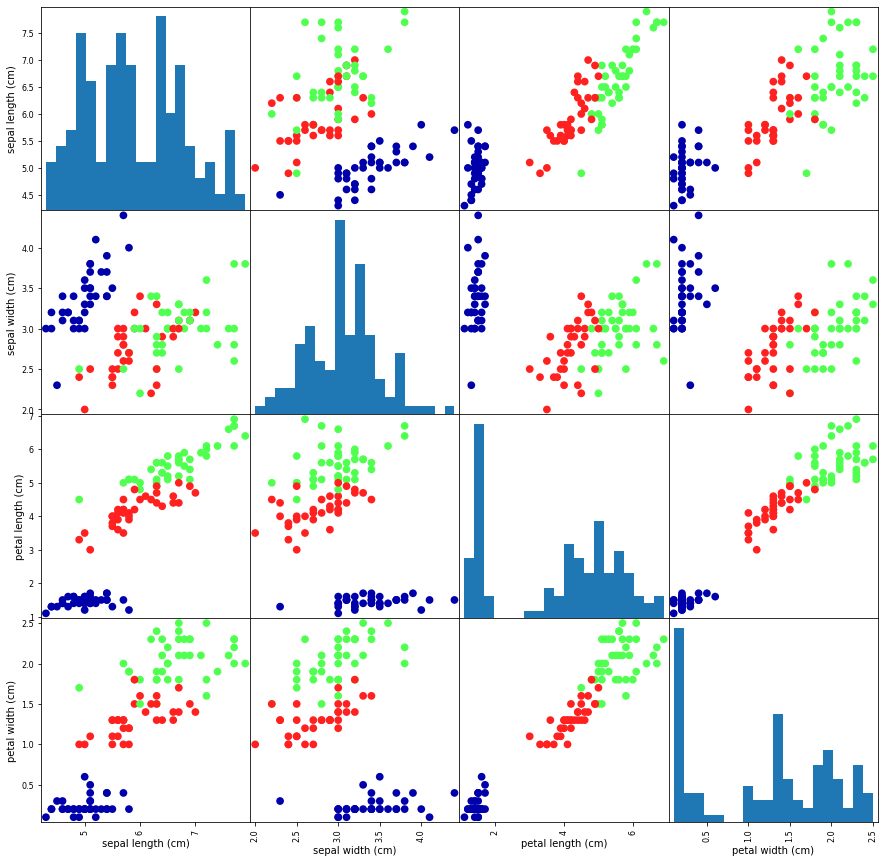

In [17]:
iris_dataframe=pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train,figsize=(15,15),marker='o',hist_kwds={'bins':20},
                          s=60,alpha=8,cmap=mglearn.cm3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

한개의 이웃 사용한다고 가정

In [19]:
X_new=np.array([[5,2.9,1,0.2]])
print("X_new.shape:",X_new.shape)

X_new.shape: (1, 4)


임의의 예시 집어넣어서 붓꽃 종류 확인

In [20]:
prediction=knn.predict(X_new)
print("예측:",prediction)
print("예측한 타깃의 이름:",iris_dataset['target_names'][prediction])

예측: [0]
예측한 타깃의 이름: ['setosa']


In [21]:
y_pred=knn.predict(X_test)
print("테스트 세트에 대한 예측값:\n",y_pred)

테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [22]:
print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred==y_test)))

테스트 세트의 정확도: 0.97


In [23]:
print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test,y_test)))

테스트 세트의 정확도: 0.97


In [24]:
X_train,X_test,y_train,y_test=train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=0)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test,y_test)))

테스트 세트의 정확도: 0.97


In [25]:
X_new1=np.array([[10,0.9,4,0.5]])
print("X_new1.shape:",X_new1.shape)

prediction1=knn.predict(X_new1)
print("예측:",prediction1)
print("예측한 타깃의 이름:",iris_dataset['target_names'][prediction1])

X_new1.shape: (1, 4)
예측: [1]
예측한 타깃의 이름: ['versicolor']


임의의 예시 10,0.9,4,0.5 넣었을 때 예측값 확인

In [65]:
X_train, X_test,y_train, y_test=train_test_split(
iris_dataset['data'],iris_dataset['target'],test_size=0.4,random_state=0)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test,y_test)))

테스트 세트의 정확도: 0.92


테스트 사이즈만 변경 나머지 유지

In [68]:
X_train, X_test,y_train, y_test=train_test_split(
iris_dataset['data'],iris_dataset['target'],test_size=0.15,random_state=0)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test,y_test)))

테스트 세트의 정확도: 1.00


테스트 사이즈를 1,1.5로 설정한 결과 정확도가 1.00나옴

In [69]:
X_train, X_test,y_train, y_test=train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=321)

knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test,y_test)))

테스트 세트의 정확도: 0.97


random_state만 처음에서 변경함

In [72]:
X_train, X_test,y_train, y_test=train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=0)

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test,y_test)))

테스트 세트의 정확도: 0.97


이웃을 3명으로 증가 시켰을때

random_state를 사용해서 (유사 난수 생성기) 데이터 셋 무작위로 섞음
함수 여러번 실행해도 같은 값 나올수 있도록 설정하는 것이다

train_test_split 함수에서 test_size 매개 변수로 테스트 세트의 비율 설정 가능.

{(1) Parameter

arrays : 분할시킬 데이터를 입력 (Python list, Numpy array, Pandas dataframe 등..)

test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) (default = 0.25)

train_size : 학습 데이터셋의 비율(float)이나 갯수(int) (default = test_size의 나머지)

random_state : 데이터 분할시 셔플이 이루어지는데 이를 위한 시드값 (int나 RandomState로 입력)

shuffle : 셔플여부설정 (default = True)

stratify : 지정한 Data의 비율을 유지한다. 예를 들어, Label Set인 Y가 25%의 0과 75%의 1로 이루어진 Binary Set일 때, stratify=Y로 설정하면 나누어진 데이터셋들도 0과 1을 각각 25%, 75%로 유지한 채 분할된다.

(2) Return

X_train, X_test, Y_train, Y_test : arrays에 데이터와 레이블을 둘 다 넣었을 경우의 반환이며, 데이터와 레이블의 순서쌍은 유지된다.

X_train, X_test : arrays에 레이블 없이 데이터만 넣었을 경우의 반환
}https://cutt.ly/Xz3ha53

In [74]:
X_train, X_test,y_train, y_test=train_test_split(
iris_dataset['data'],iris_dataset['target'],random_state=0)

knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test,y_test)))

테스트 세트의 정확도: 0.97


3장 지도학습

In [26]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

preamble은 따로 빼서 하기에 실행하였음

In [27]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler

# 맷플롯립 한글 폰트 지정
import matplotlib
matplotlib.rc('font', family='NanumBarunGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
    cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
    cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))


np.set_printoptions(precision=3, suppress=True)

pd.set_option("display.max_columns", 8)
pd.set_option('precision', 2)

__all__ = ['np', 'mglearn', 'display', 'plt', 'pd']

X.shape: (26, 2)


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


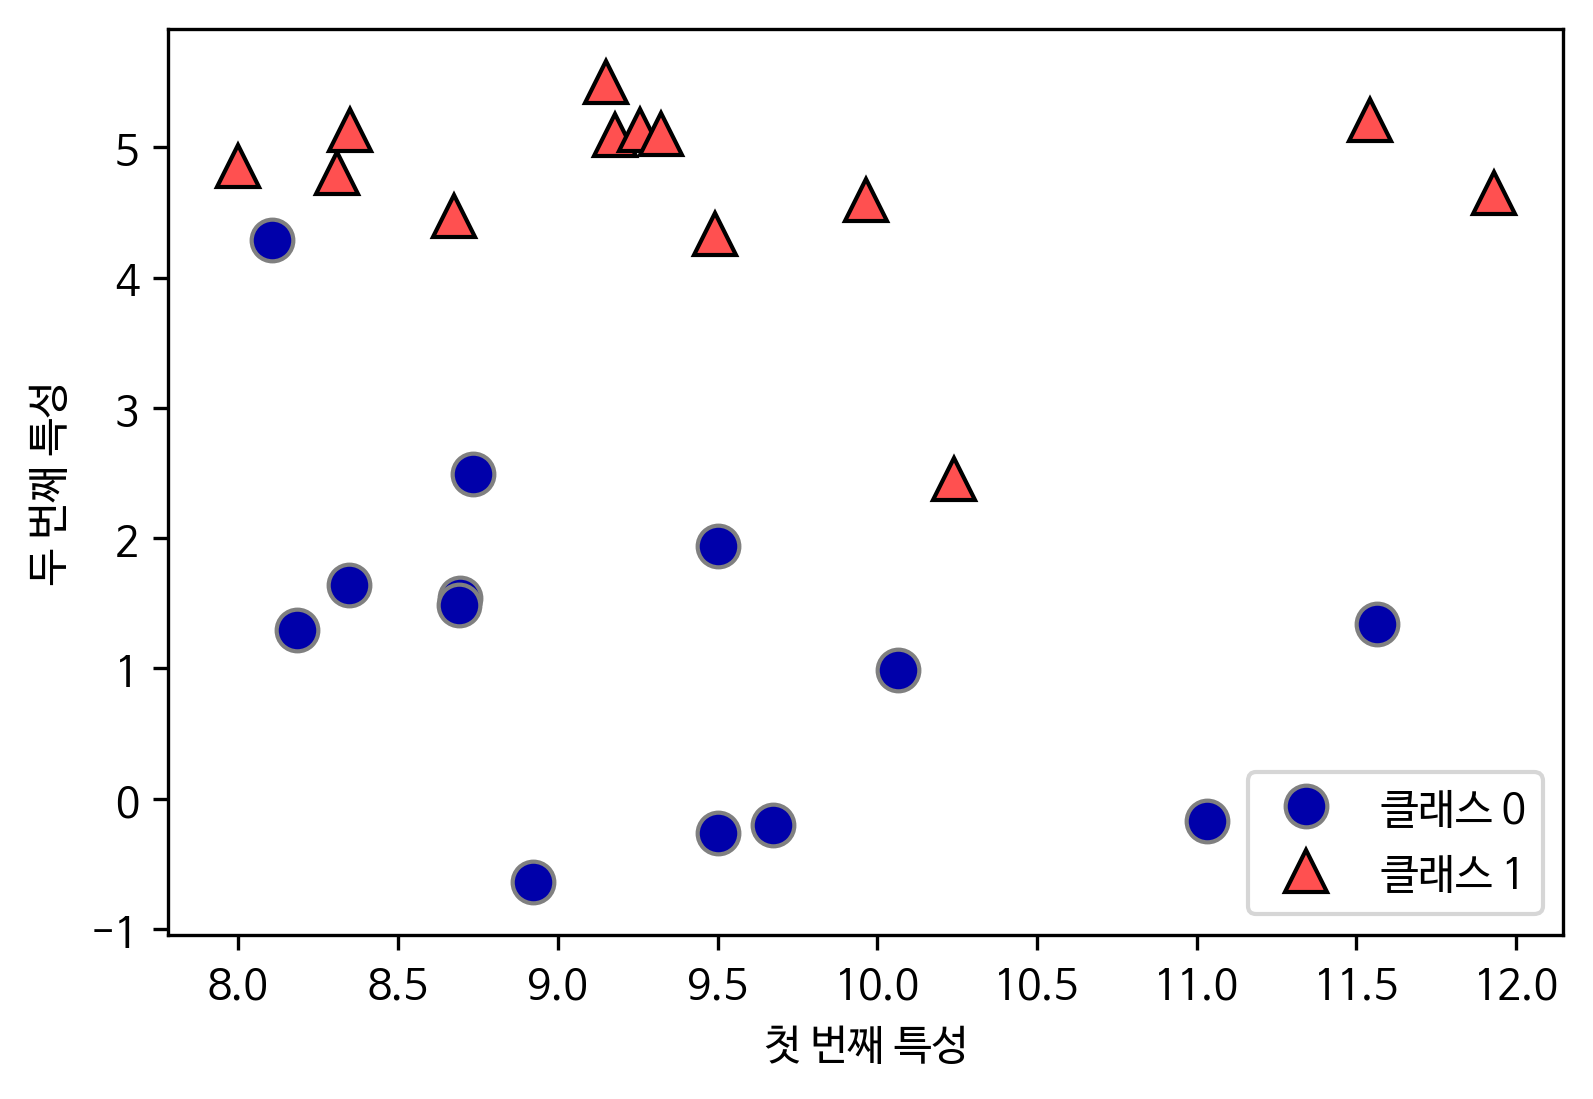

In [28]:
X,y=mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0","클래스 1"],loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:",X.shape)

인위적으로 이진 분류 데이터셋 생성 후 산점도 그림

나눔고딕 폰트가 없어 실행이 안되어 다운받아야했음
https://jinyes-tistory.tistory.com/70 //참고

In [29]:
matplotlib.get_cachedir()

'C:\\Users\\bada1\\.matplotlib'

글꼴 위치 알아보기위해서 사용

In [30]:
print(X, '\n')

[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]] 



In [31]:
print(type(X))

<class 'numpy.ndarray'>


In [32]:
print(X,'\n',type(X),'\n',X.shape)

[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]] 
 <class 'numpy.ndarray'> 
 (26, 2)


In [33]:
print(y,'\n',type(y),'\n',y.shape)

[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0] 
 <class 'numpy.ndarray'> 
 (26,)


Text(0, 0.5, '타깃')

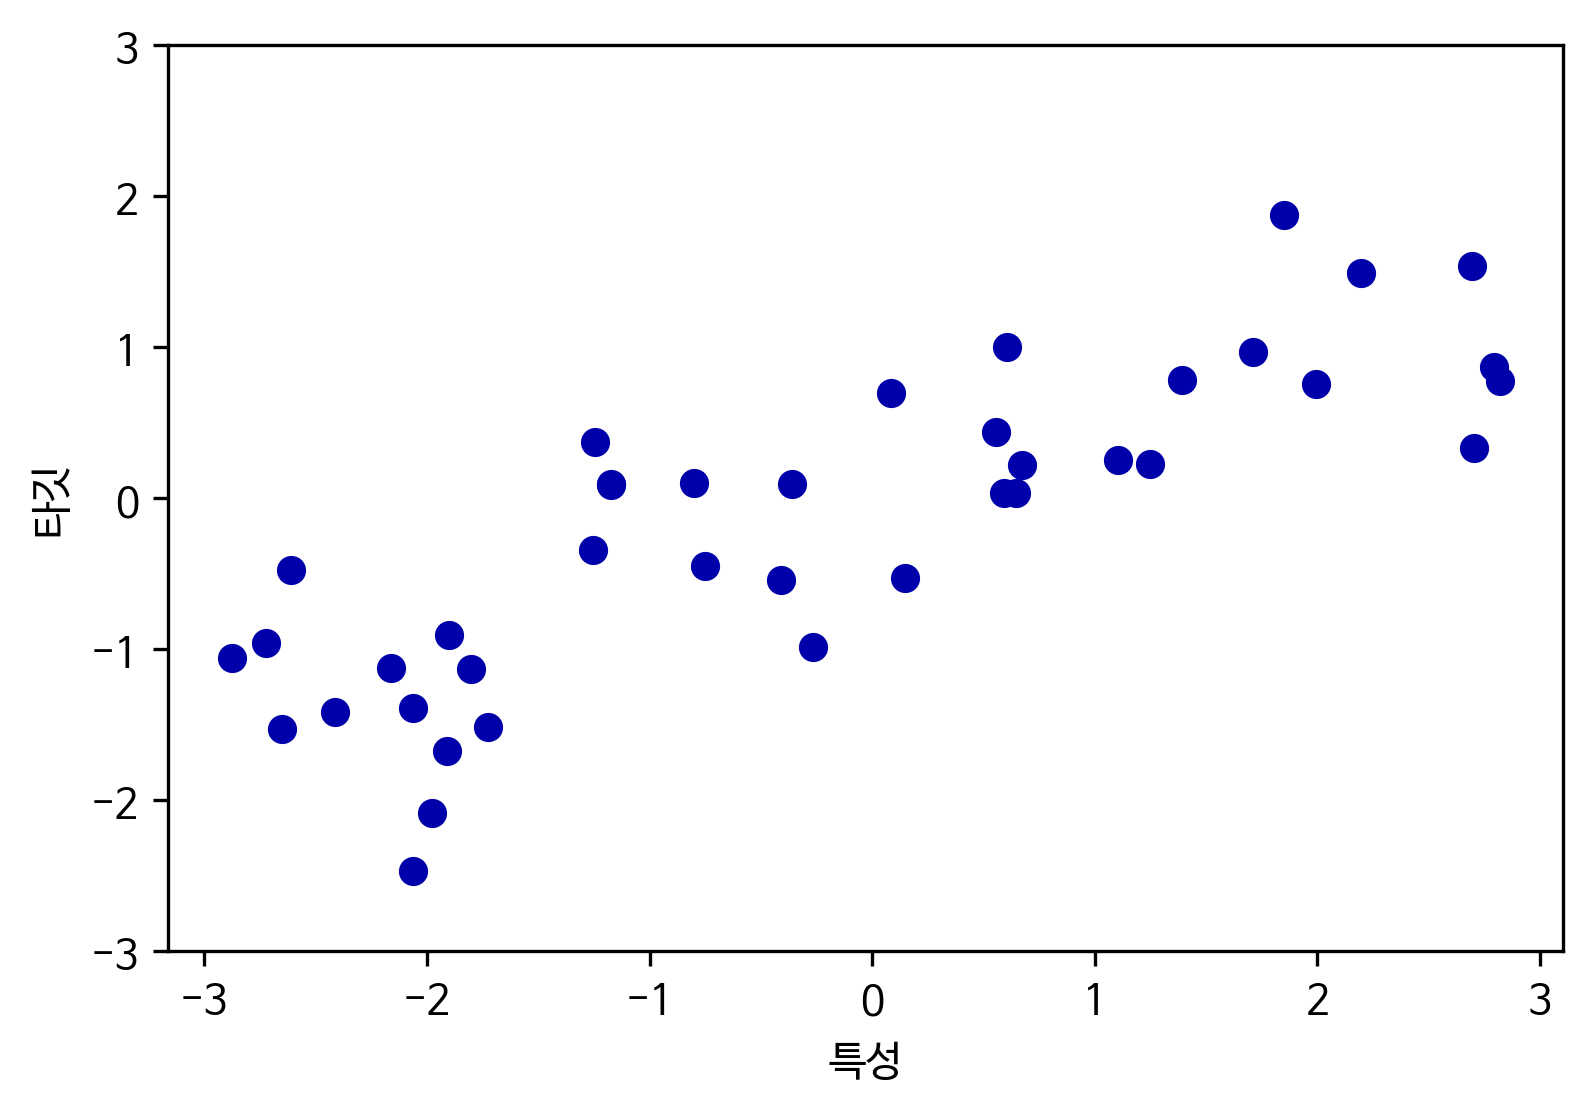

In [34]:
X,y=mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [35]:
print(X,'\n',type(X),'\n',X.shape)
print(y,'\n',type(y),'\n',y.shape)

[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]
 [-2.876]
 [ 2.819]
 [ 1.995]
 [-1.726]
 [-1.909]
 [-1.9  ]
 [-1.175]
 [ 0.149]
 [-0.408]
 [-1.253]
 [ 0.671]
 [-2.163]
 [-1.247]
 [-0.802]
 [-0.264]
 [ 1.711]
 [-1.802]
 [ 0.085]
 [ 0.554]
 [-2.721]
 [ 0.645]
 [-1.977]
 [-2.61 ]
 [ 2.693]
 [ 2.794]
 [ 1.85 ]
 [-1.172]
 [-2.414]
 [ 1.105]
 [-0.359]] 
 <class 'numpy.ndarray'> 
 (40, 1)
[-0.448  0.331  0.779  0.035 -1.388 -2.472 -1.527  1.494  1.     0.23
 -1.06   0.779  0.754 -1.514 -1.673 -0.905  0.084 -0.527 -0.541 -0.341
  0.218 -1.125  0.373  0.098 -0.986  0.967 -1.135  0.698  0.437 -0.957
  0.035 -2.086 -0.474  1.537  0.869  1.877  0.095 -1.415  0.254  0.094] 
 <class 'numpy.ndarray'> 
 (40,)


winsconsin breast cancer data

In [36]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys():\n",cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [37]:
print("데이터의 형태:",cancer.data.shape)

데이터의 형태: (569, 30)


569개 데이터 포인트, 특성 30개

In [38]:
print("클래스별 샘플 갯수: \n",
     {n: v for n, v in zip(cancer.target_names,np.bincount(cancer.target))})

클래스별 샘플 갯수: 
 {'malignant': 212, 'benign': 357}


In [39]:
print("특성 이름: \n",cancer.feature_names)

특성 이름: 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [40]:
print("cancer.data: \n{}".format(cancer.data))

cancer.data: 
[[ 17.99   10.38  122.8   ...   0.265   0.46    0.119]
 [ 20.57   17.77  132.9   ...   0.186   0.275   0.089]
 [ 19.69   21.25  130.    ...   0.243   0.361   0.088]
 ...
 [ 16.6    28.08  108.3   ...   0.142   0.222   0.078]
 [ 20.6    29.33  140.1   ...   0.265   0.409   0.124]
 [  7.76   24.54   47.92  ...   0.      0.287   0.07 ]]


In [41]:
print("cancer.target:\n{}".format(cancer.target))

cancer.target:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1

보스턴 주택 가격

In [42]:
from sklearn.datasets import load_boston
boston=load_boston()
print("boston 데이터의 형태:", boston.data.shape)
print("voston.keys():\n",boston.keys())
print("클래스별 샘플 갯수:\n",
     {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})
print("특성 이름 :\n",boston.feature_names)
print("boston.target: \n{}".format(boston.target))

boston 데이터의 형태: (506, 13)
voston.keys():
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
클래스별 샘플 갯수:
 {'malignant': 212, 'benign': 357}
특성 이름 :
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
boston.target: 
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 

KNN

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn

In [44]:
from matplotlib import font_manager, rc
font_name=font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font',family=font_name)

In [45]:
X,y=mglearn.datasets.make_forge()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


X.shape:(26, 2)


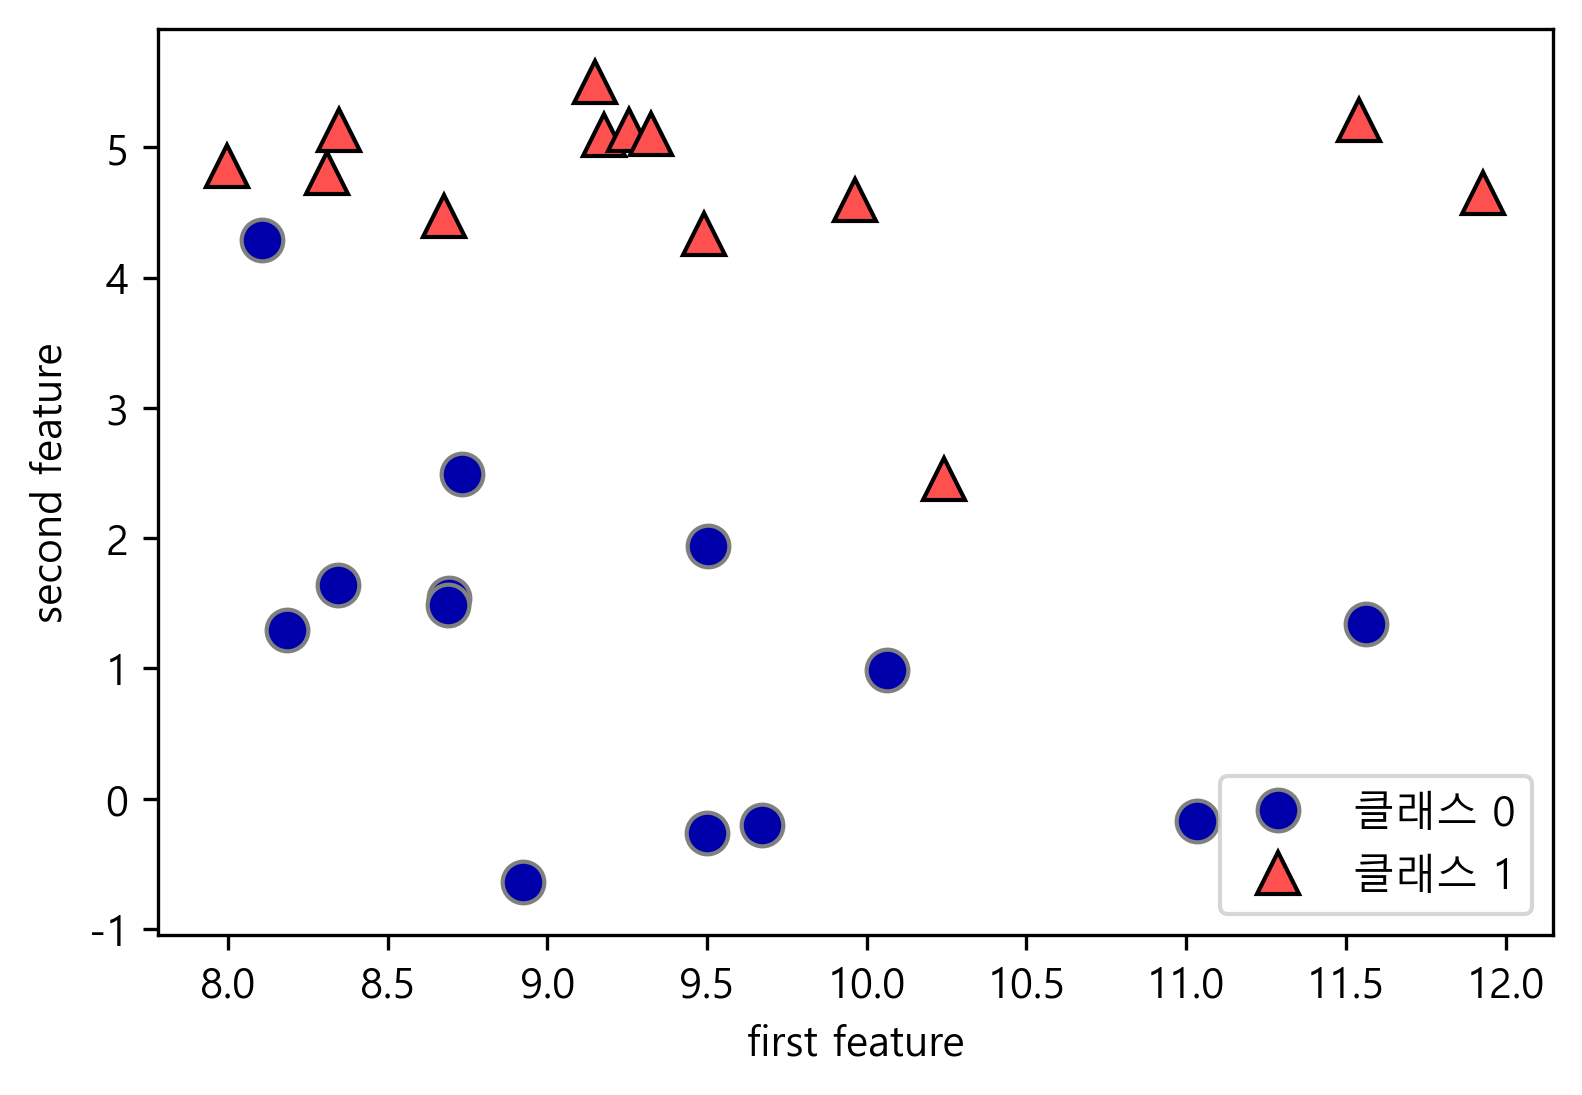

In [46]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["클래스 0","클래스 1"],loc=4)
plt.xlabel("first feature")
plt.ylabel("second feature")
print("X.shape:{}".format(X.shape))

In [47]:
from sklearn.model_selection import train_test_split
X,y=mglearn.datasets.make_forge()

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


데이터 로드

In [48]:
print("X.shape:{}".format(X.shape),"y.shape:{}".format(y.shape))

X.shape:(26, 2) y.shape:(26,)


In [49]:
X_train, X_test, y_train,y_test=train_test_split(X,y,random_state=0)

훈련:테스트 값 나눔 (3:1)

In [50]:
print("X_train.shape:{}".format(X_train.shape),"X_test.shape:{}".format(X_test.shape))

X_train.shape:(19, 2) X_test.shape:(7, 2)


In [51]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=3)

이웃 수=3으로 측정

In [52]:
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [53]:
print("테스트 세트 예측:{}".format(clf.predict(X_test)))

테스트 세트 예측:[1 0 1 0 1 0 0]


In [54]:
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도:0.86


D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


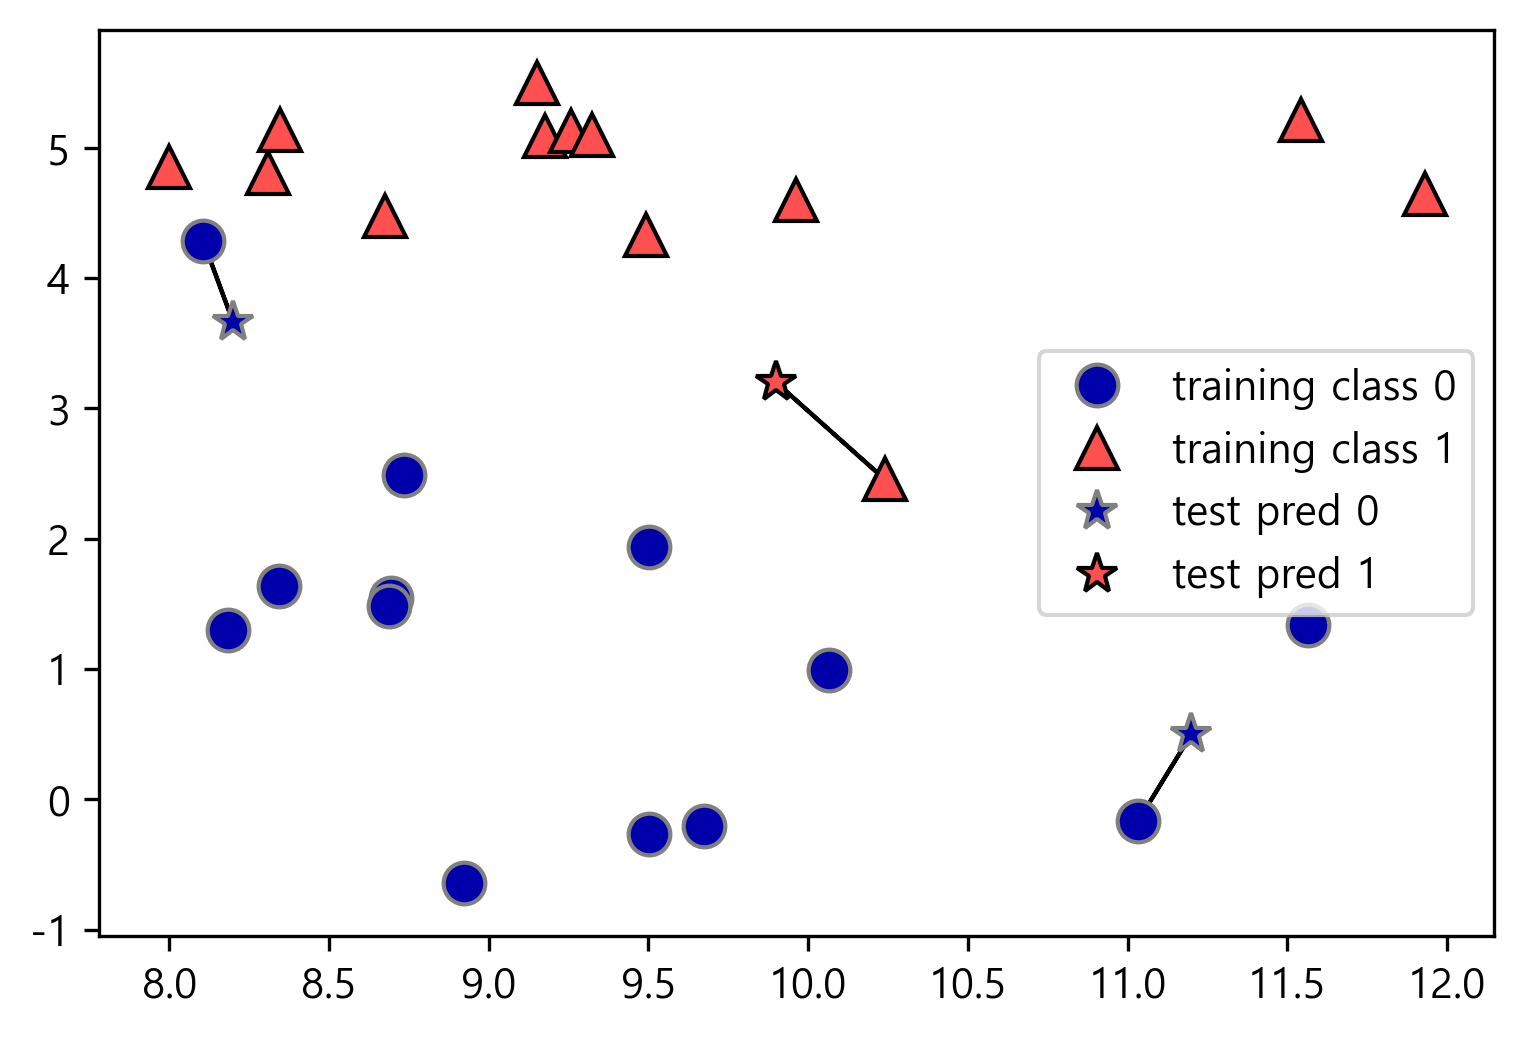

In [55]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

forge 데이터셋에 대한 1-최근접 이웃 모델 예측

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


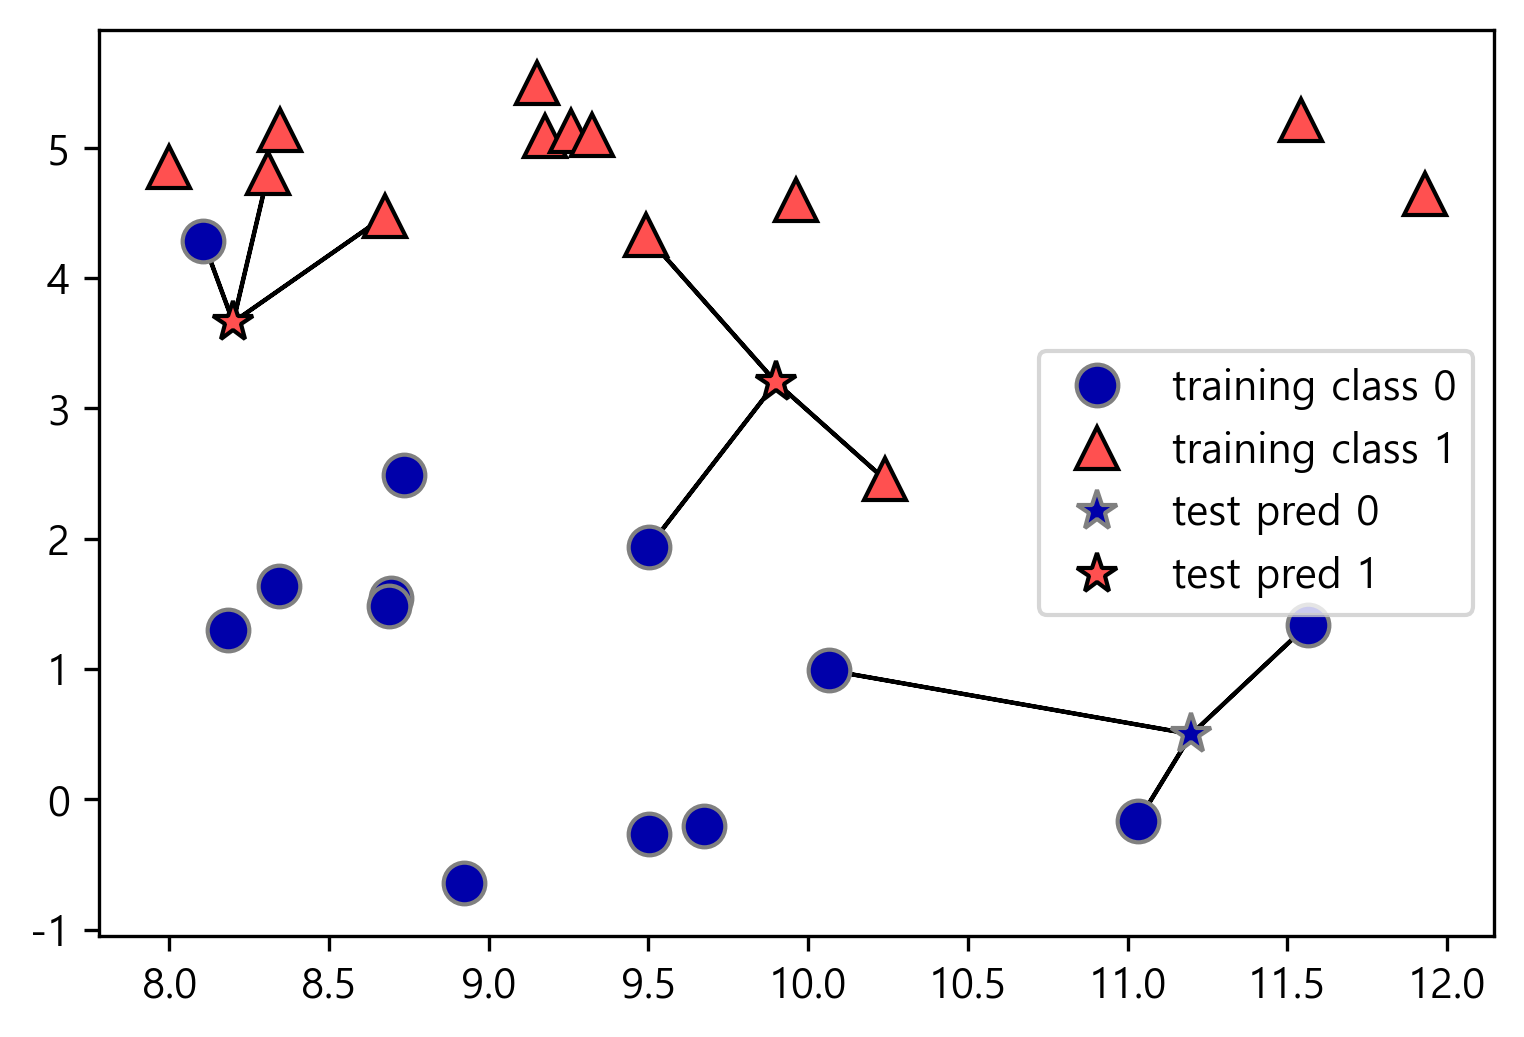

In [56]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

forge 데이터셋에 대한 3-최근접 이웃 모델의 예측

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


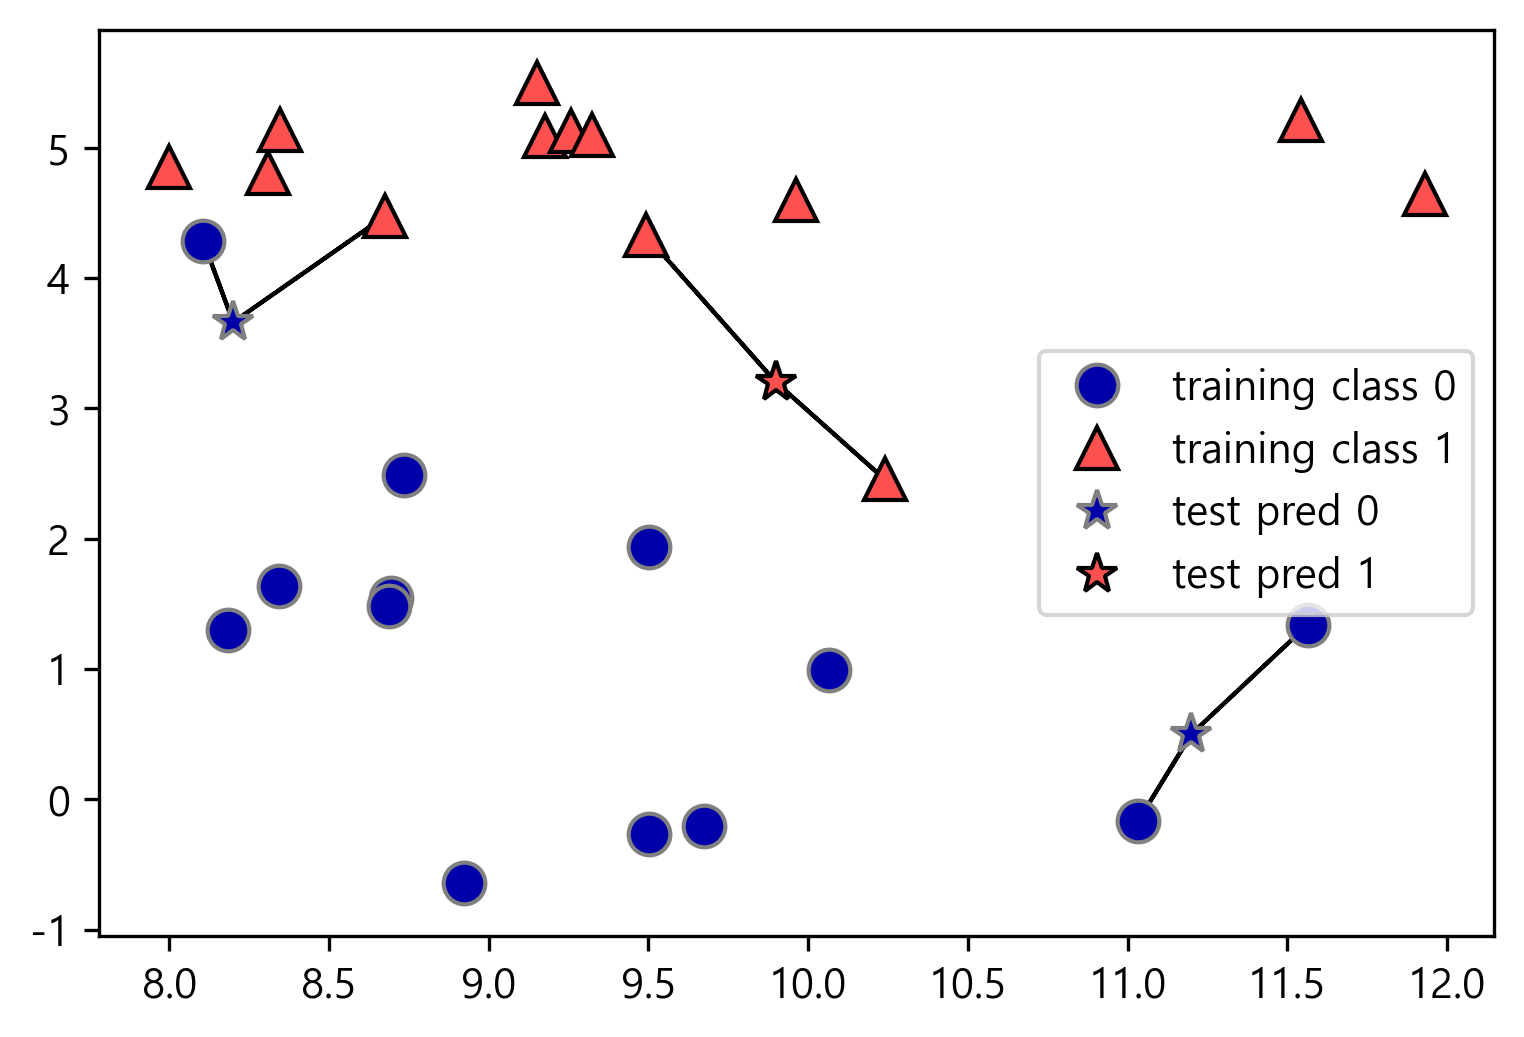

In [81]:
mglearn.plots.plot_knn_classification(n_neighbors=2)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


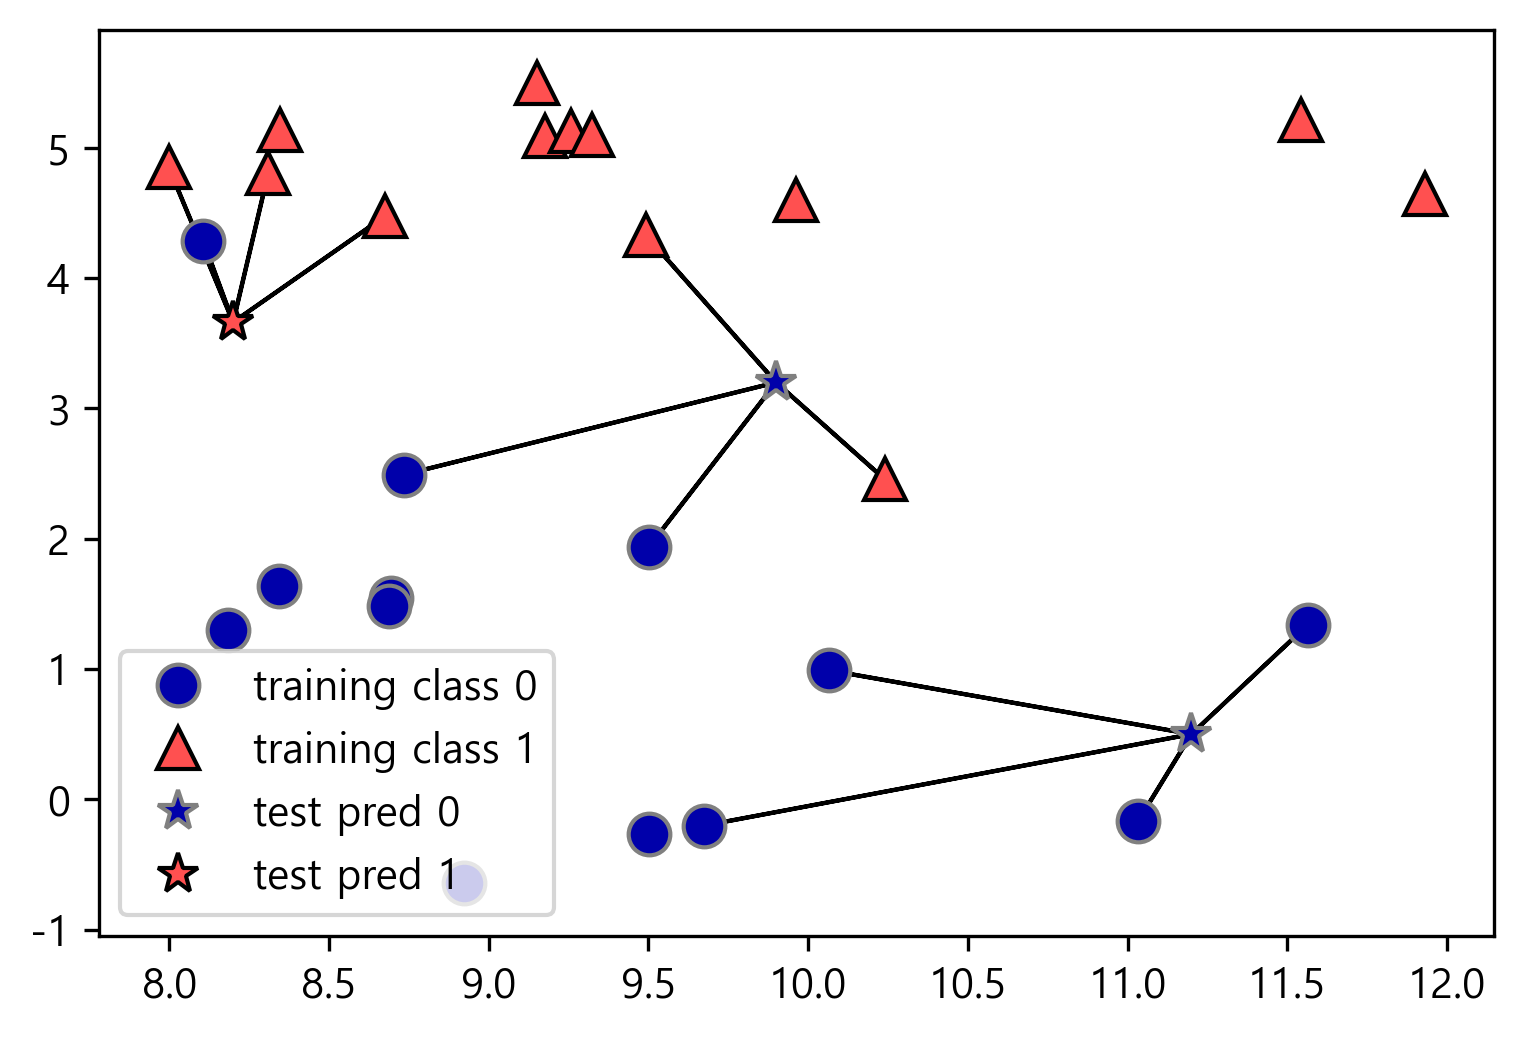

In [82]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


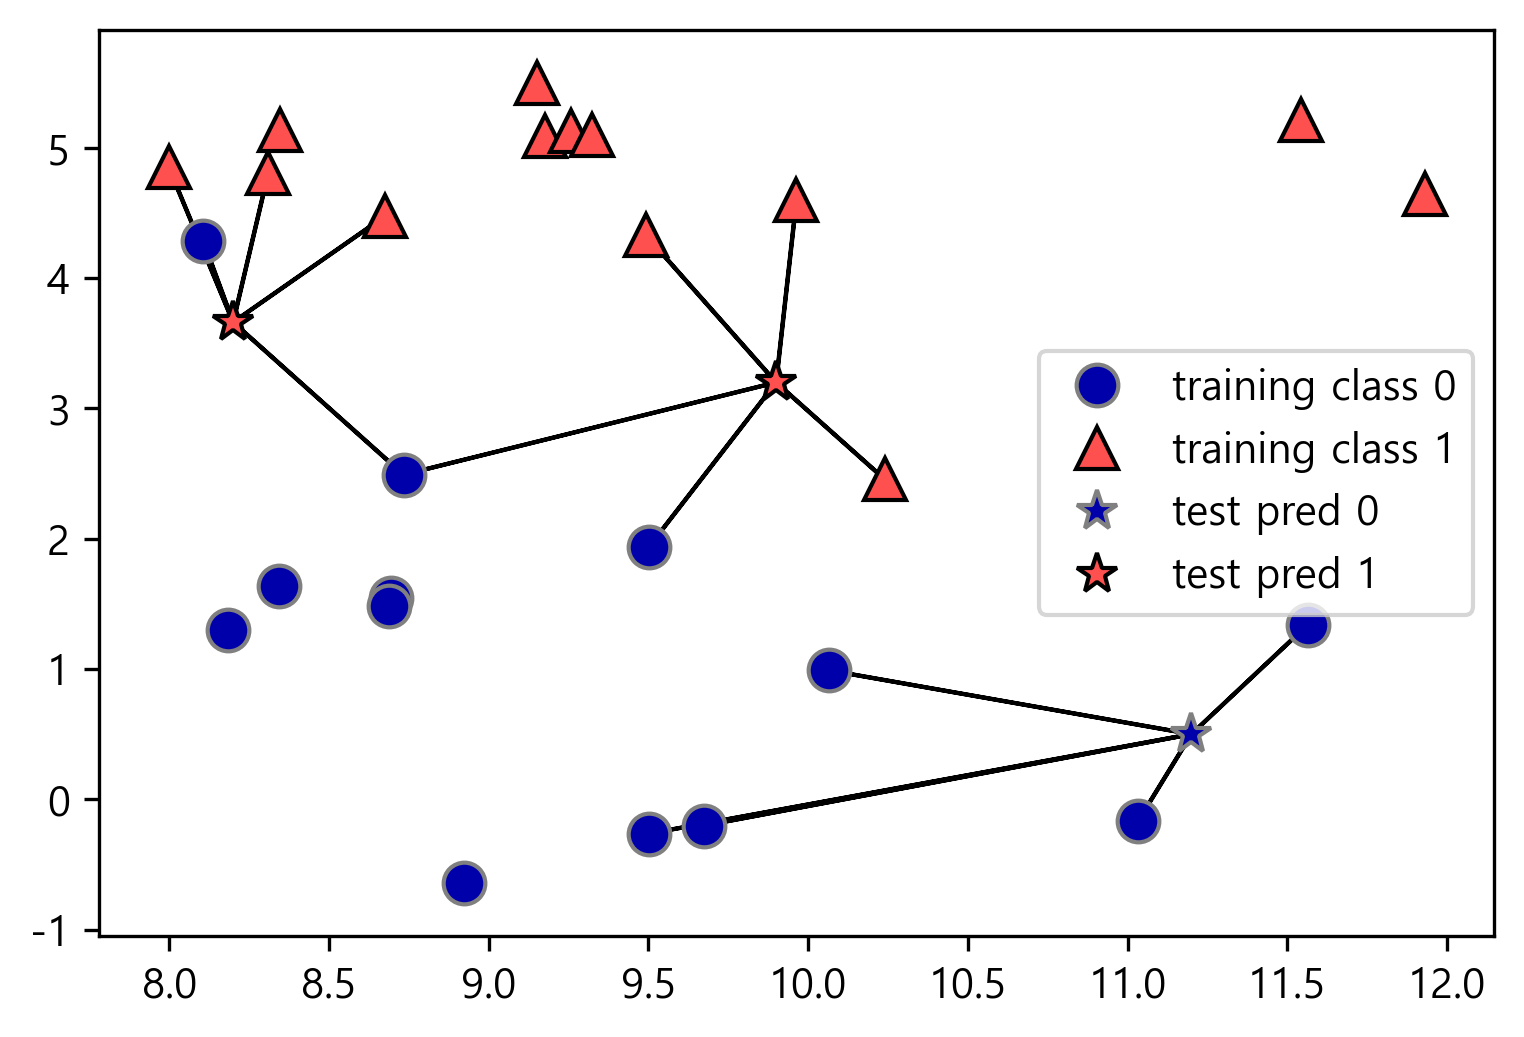

In [83]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

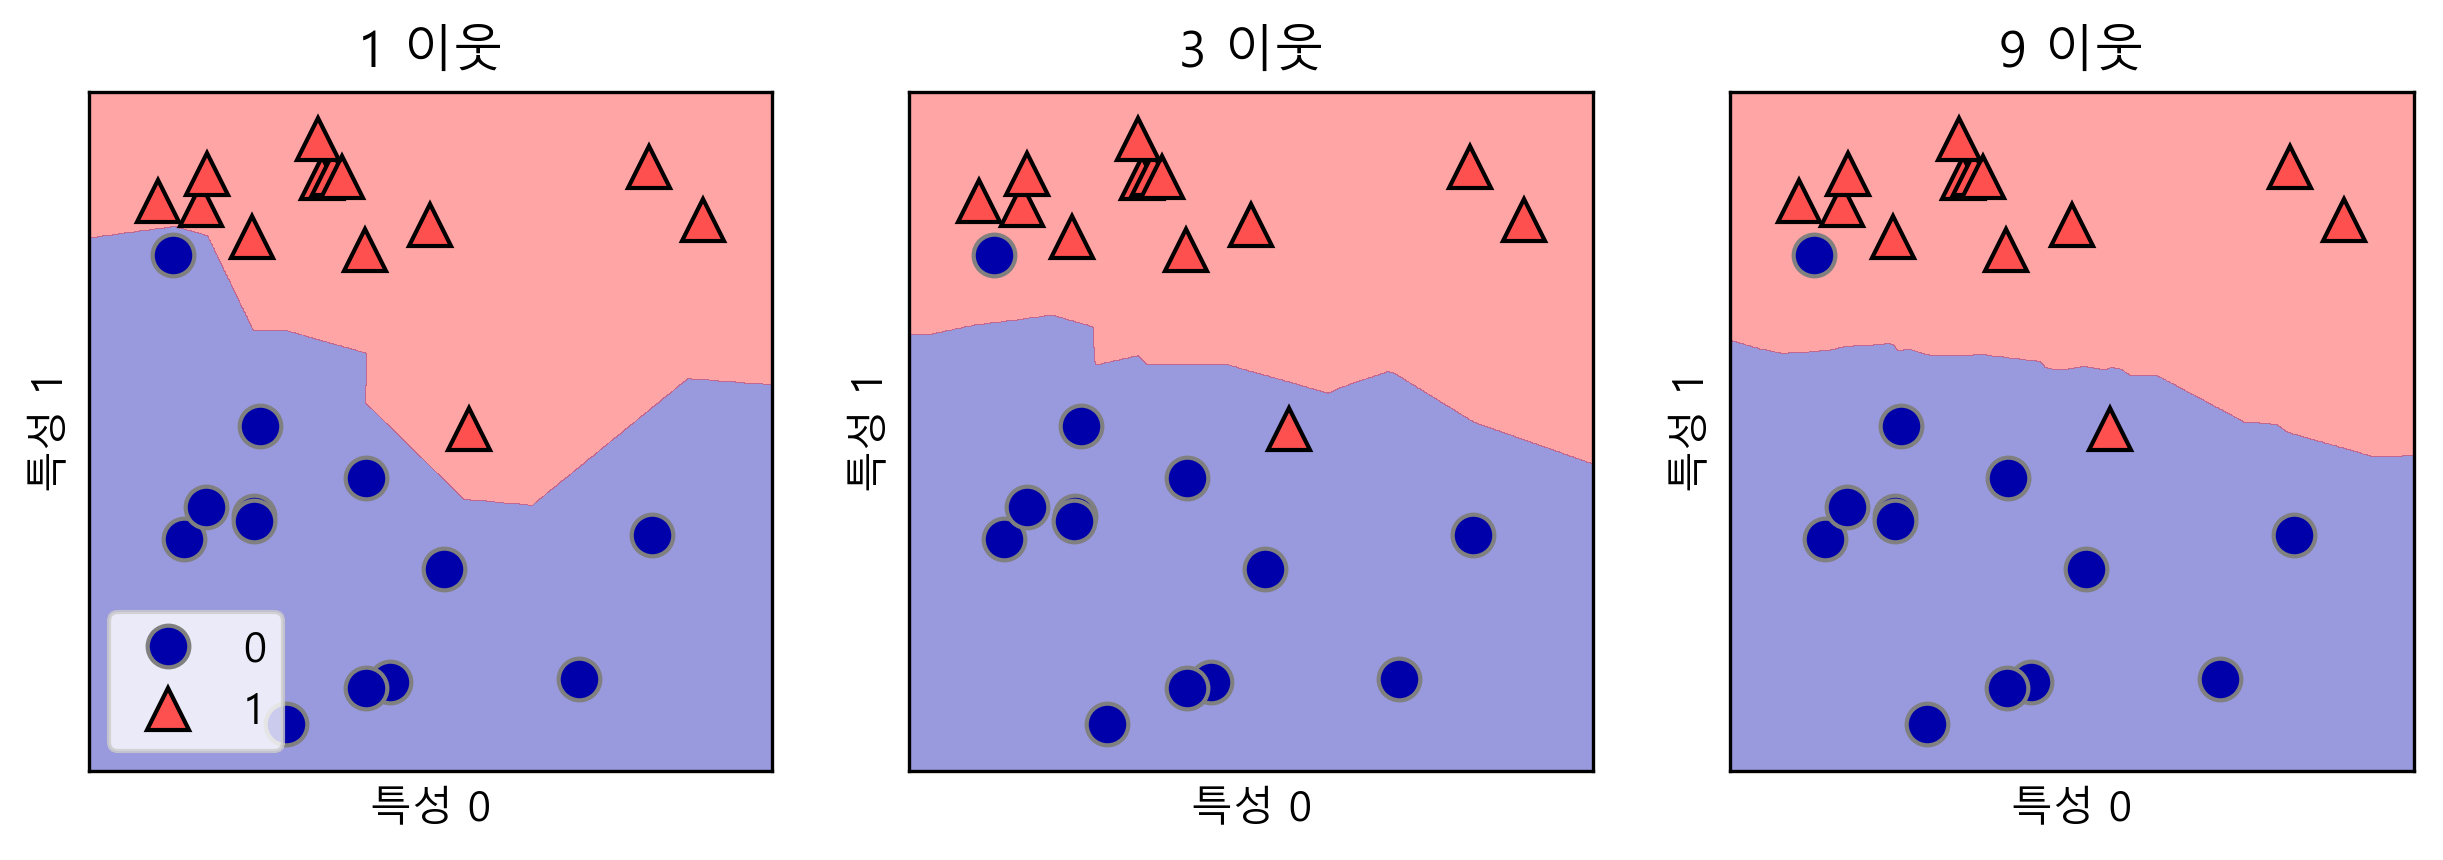

In [57]:
fig, axes=plt.subplots(1,3,figsize=(10,3))

for n_neighbors, ax in zip([1,3,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

각자 이웃 1, 3, 9일때 모습 보여줌

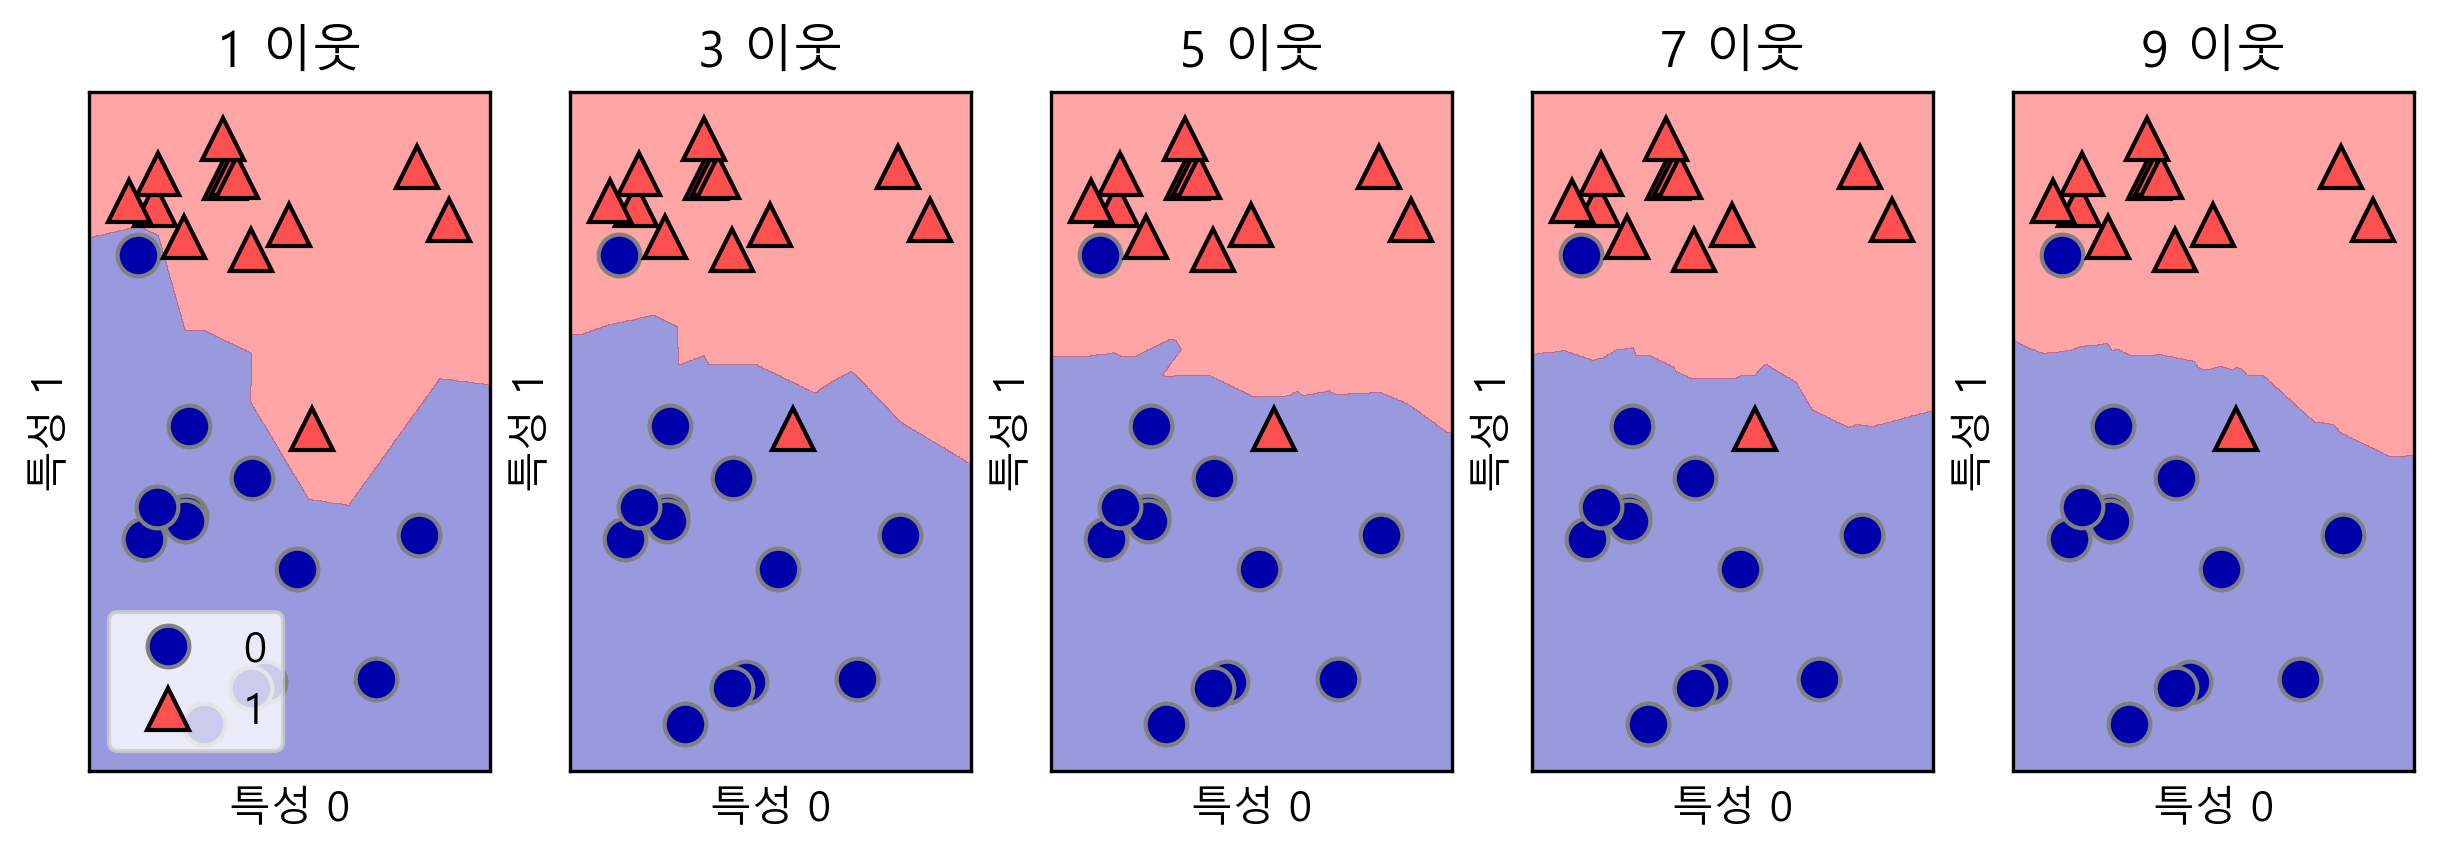

In [79]:
fig, axes=plt.subplots(1,5,figsize=(10,3))

for n_neighbors, ax in zip([1,3,5,7,9],axes):
    clf=KNeighborsClassifier(n_neighbors=n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf,X,fill=True,eps=0.5,ax=ax,alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

이웃의 수는 주로 홀수로 작성하기때문에 1부터 9까지 홀수 값으로 이웃수를 설정하였음

In [58]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()
print("cancer.keys():{}".format(cancer.keys()))

cancer.keys():dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [59]:
print("Shape:{}".format(cancer.data.shape))

Shape:(569, 30)


In [60]:
print("클래스별 샘플 갯수:\n{}".format(
    {n: v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 갯수:
{'malignant': 212, 'benign': 357}


In [61]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [62]:
X_train, X

(array([[ 8.922, -0.64 ],
        [ 8.734,  2.492],
        [ 9.323,  5.098],
        [ 7.998,  4.853],
        [11.033, -0.168],
        [ 9.177,  5.093],
        [11.564,  1.339],
        [ 9.151,  5.498],
        [ 8.348,  5.134],
        [11.93 ,  4.649],
        [ 8.106,  4.287],
        [ 8.675,  4.476],
        [ 9.673, -0.203],
        [ 9.502,  1.938],
        [ 8.693,  1.543],
        [ 9.963,  4.597],
        [ 9.5  , -0.264],
        [ 9.257,  5.133],
        [ 8.689,  1.487]]),
 array([[ 9.963,  4.597],
        [11.033, -0.168],
        [11.542,  5.211],
        [ 8.693,  1.543],
        [ 8.106,  4.287],
        [ 8.31 ,  4.806],
        [11.93 ,  4.649],
        [ 9.673, -0.203],
        [ 8.348,  5.134],
        [ 8.675,  4.476],
        [ 9.177,  5.093],
        [10.24 ,  2.455],
        [ 8.689,  1.487],
        [ 8.922, -0.64 ],
        [ 9.491,  4.332],
        [ 9.257,  5.133],
        [ 7.998,  4.853],
        [ 8.184,  1.296],
        [ 8.734,  2.492],
        [ 

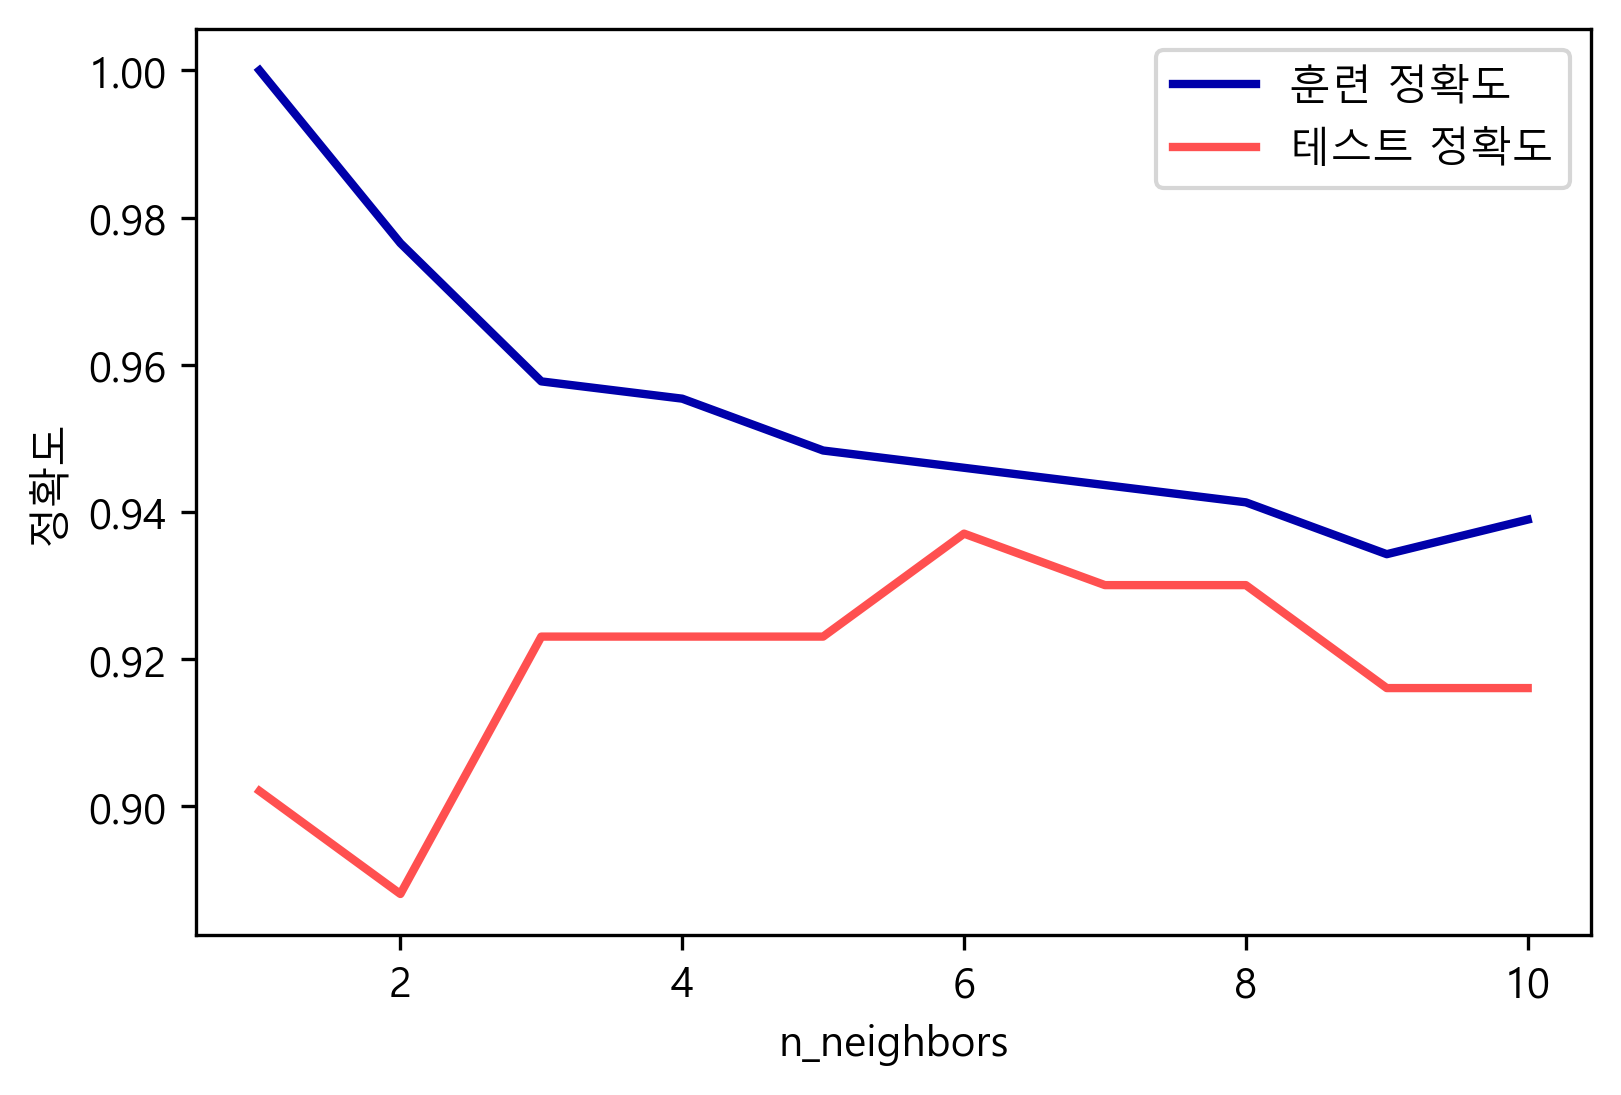

In [63]:
X_train, X_test, y_train, y_test=train_test_split(
cancer.data,cancer.target,stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,11)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

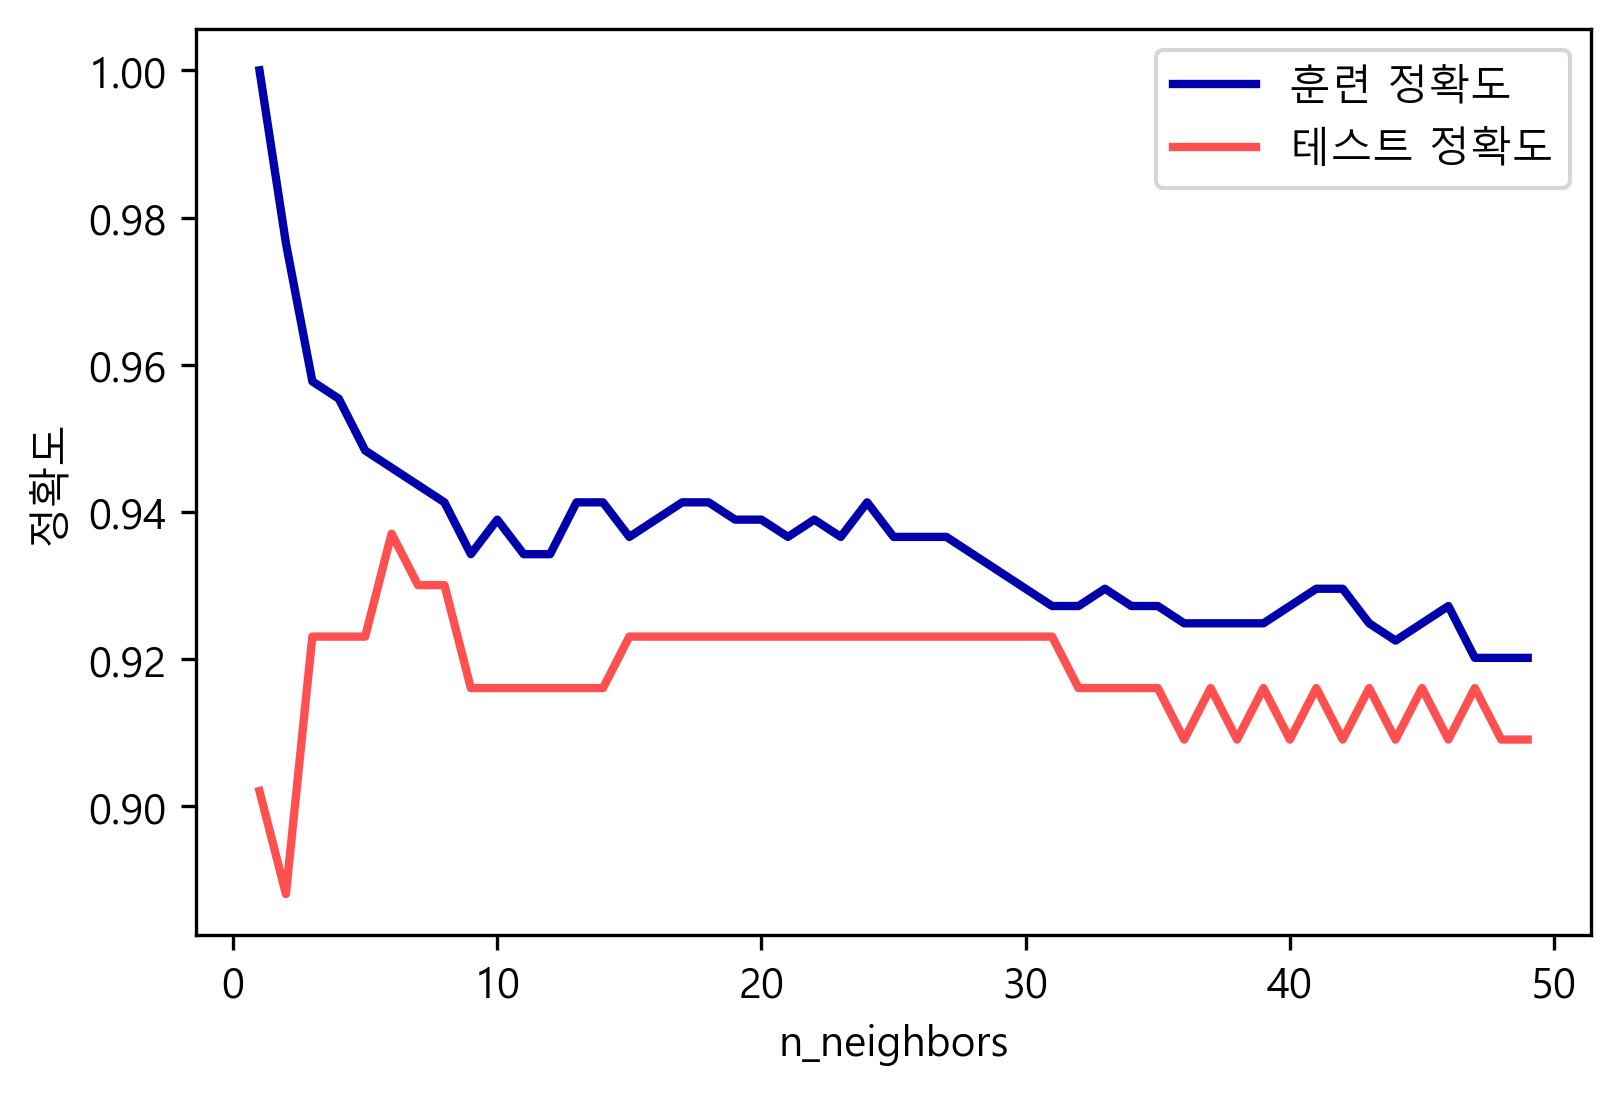

In [75]:
X_train, X_test, y_train, y_test=train_test_split(
cancer.data,cancer.target,stratify=cancer.target, random_state=66)

training_accuracy=[]
test_accuracy=[]

neighbors_settings=range(1,50)

for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

이웃 범위를 1부터 50미만까지로 설정하였을때 상기와 같은 그래프가 생성된다